**MLPClassifier** is an estimator available as a part of the neural_network module of sklearn for performing classification tasks using a multi-layer perceptron

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import tensorflow as tf
import time

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [8]:
try:
  data = pd.read_csv('Structured_features.csv')
except:
  print('No such file')

In [40]:
# encode the erbium concentration float value to int
uniq_concent = data["Erbium Concentration"].unique().tolist()
conc_encoded = {x: i for i, x in enumerate(uniq_concent)}
data["Erbium Concentration"] = data["Erbium Concentration"].map(conc_encoded)
data

,Longitudinal modulus,Shear modulus,Bulk modulus,Young modulus,Poisson's ratio,Hardness,fractal bond connectivity,acoustic impedance,Erbium Concentration
0,60.505571,20.125896,33.671042,50.346610,0.250792,3.343693,2.390885,17.829646,0
1,61.749309,20.539600,34.363176,51.381524,0.250792,3.412425,2.390885,18.196148,0
2,60.206152,20.026301,33.504417,50.097465,0.250792,3.327146,2.390885,17.741414,0
3,62.014179,20.627703,34.510575,51.601922,0.250792,3.427063,2.390885,18.274199,0
4,62.831822,20.899675,34.965589,52.282281,0.250792,3.472248,2.390885,18.515140,0
...,...,...,...,...,...,...,...,...,...
245,58.273308,19.835527,31.825938,49.270607,0.241979,3.411991,2.493001,17.663388,4
246,57.141365,19.450228,31.207728,48.313539,0.241979,3.345714,2.493001,17.320282,4
247,61.777979,21.028475,33.740012,52.233838,0.241979,3.617195,2.493001,18.725699,4
248,58.251540,19.828118,31.814050,49.252202,0.241979,3.410717,2.493001,17.656790,4


In [43]:
# for later decode use
encoded_to_conc = {i: x for i, x in enumerate(uniq_concent)}
encoded_to_conc

{0: 0.01, 1: 0.02, 2: 0.03, 3: 0.04, 4: 0.05}

In [41]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

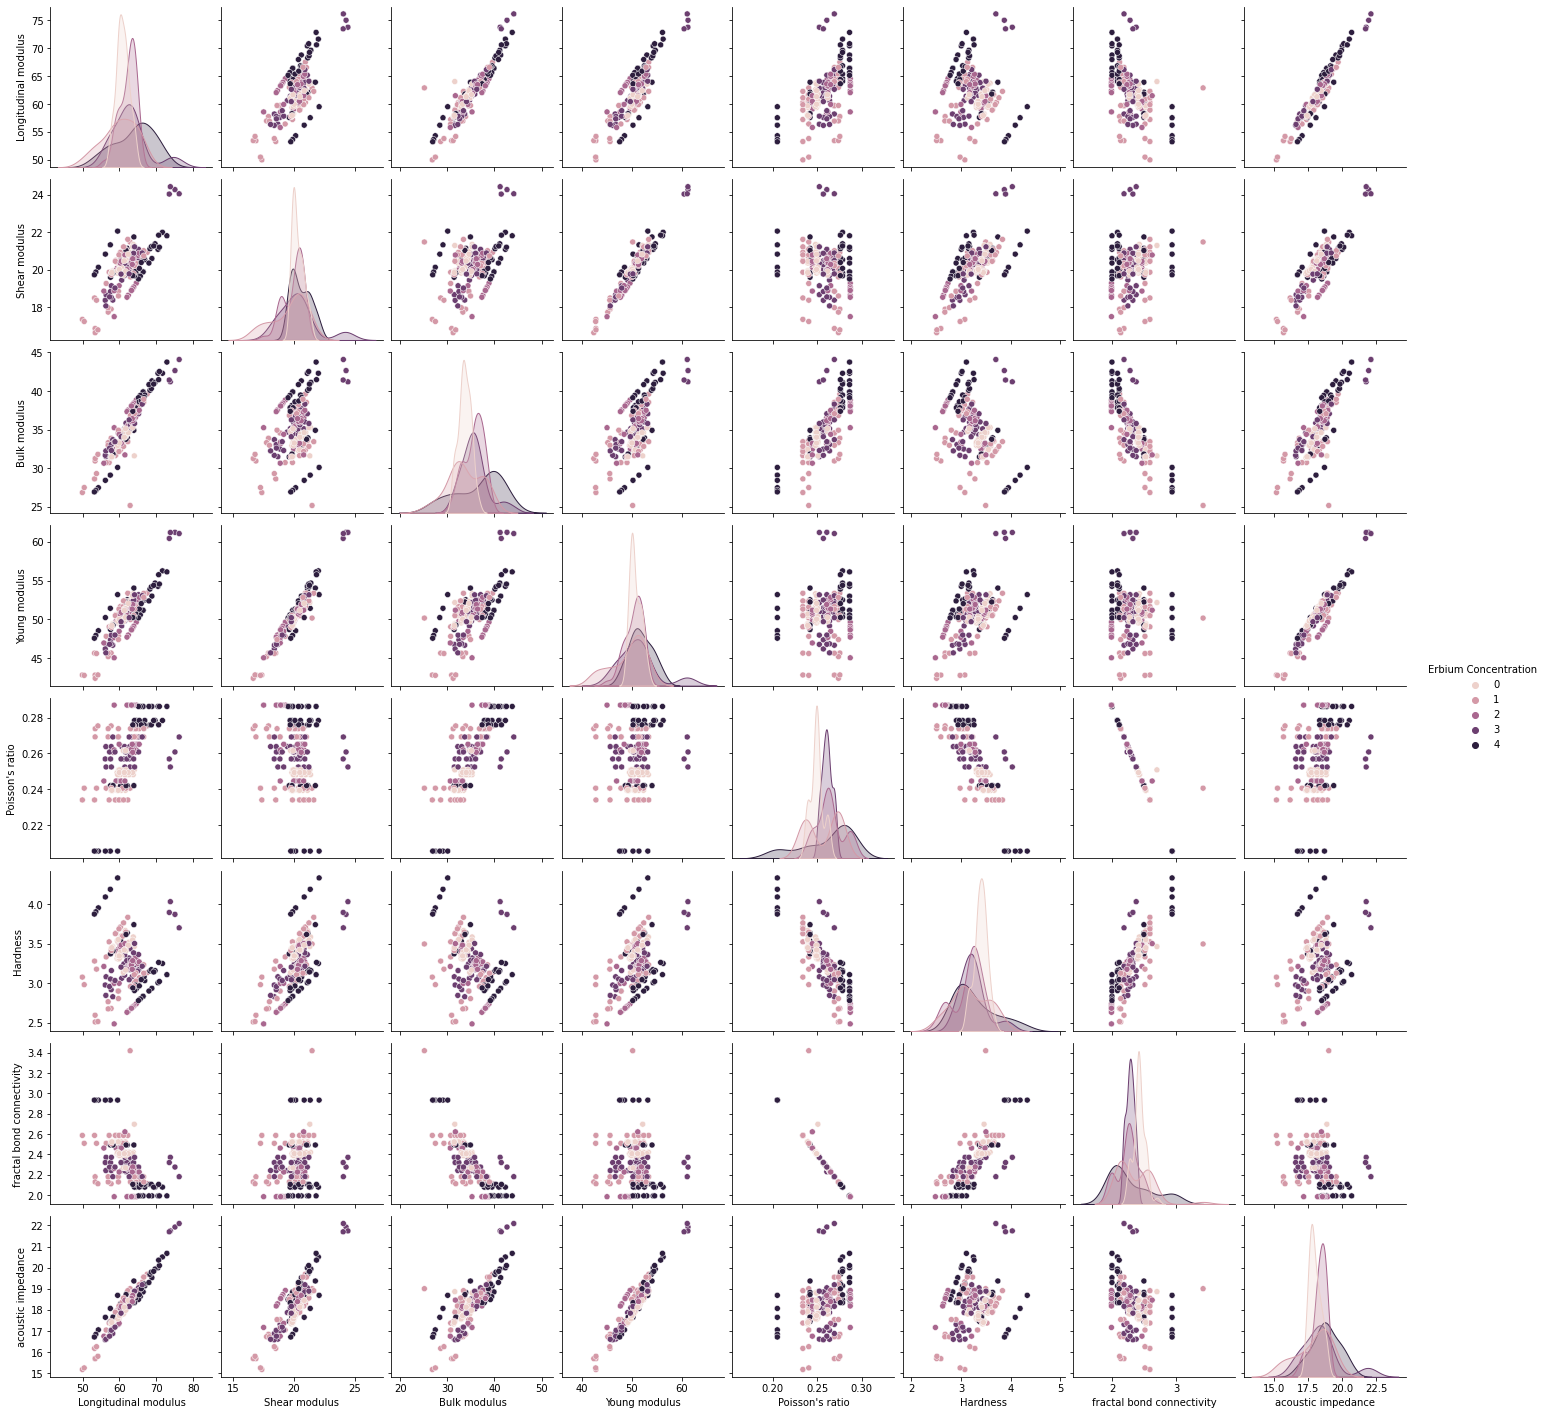

In [42]:
sns.pairplot(train_dataset, diag_kind='kde', hue="Erbium Concentration")

In [44]:
# Collect input feature for training, molar volume value in this case
train_features = train_dataset.copy() #dataframe type
test_features = test_dataset.copy()

# Collect respective label, density value in this case
train_labels = train_features.pop('Erbium Concentration') # series type
test_labels = test_features.pop('Erbium Concentration')

In [101]:
mlp_classifier  = MLPClassifier(
                                random_state=10,
                                early_stopping=True,
                                )

In [103]:
parameter_space = {
    'hidden_layer_sizes': [(32,64,128),(128,256,512),(256,512,1024)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [200, 300, 500],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=5)
clf.fit(train_features, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=True,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001],

In [104]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.210 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
0.395 (+/-0.107) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
0.210 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'sgd'}
0.395 (+/-0.107) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'adam'}
0.210 (+/-0.024) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
0.395 (+/-0.107) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
0.225 (+/-0.077) for {'activati

In [105]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 64, 128), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}


In [181]:
final_mlp_classifier  = MLPClassifier(
                                activation='tanh',
                                alpha=0.0001,
                                hidden_layer_sizes= (32, 128, 64),
                                max_iter= 1000,
                                learning_rate = 'constant',
                                early_stopping=True,
                                validation_fraction=0.2,
                                )

mlp_model = final_mlp_classifier.fit(np.array(train_features), np.array(train_labels))

pred_y = final_mlp_classifier.predict(test_features)
train_acc = final_mlp_classifier.score(train_features, train_labels)
test_acc = final_mlp_classifier.score(test_features, test_labels)

print('Training Accuracy : %.3f'%train_acc)
print('Test Accuracy : %.3f'%test_acc)

Training Accuracy : 0.450
Test Accuracy : 0.340


In [182]:
y_true, y_pred = test_labels , final_mlp_classifier.predict(test_features)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.36      0.62      0.45         8
           1       0.00      0.00      0.00        11
           2       0.31      0.62      0.42         8
           3       0.20      0.09      0.13        11
           4       0.55      0.50      0.52        12

    accuracy                           0.34        50
   macro avg       0.28      0.37      0.30        50
weighted avg       0.28      0.34      0.29        50



In [183]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [184]:
cm = confusion_matrix(pred_y, test_labels)
accuracy(cm)

0.34

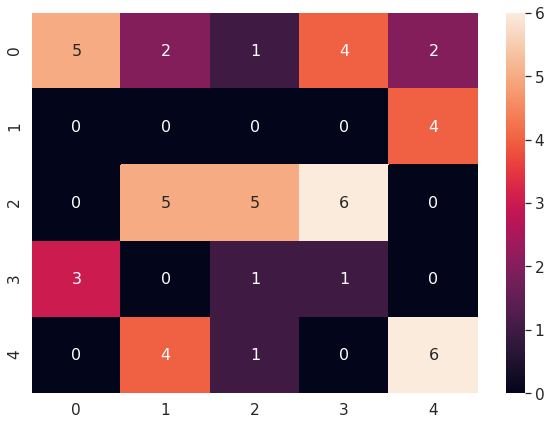

In [185]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()